<a href="https://colab.research.google.com/github/badri506/badri506/blob/main/Customerchurnprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data collecting and importing necessary libraries

In [54]:
# @title Importing necessory libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

df=pd.read_csv("/content/drive/MyDrive/DA project/customer churn/telkodata.csv")

# Data cleaning and exploration


In [ ]:
df.shape

(7043, 33)

In [55]:
df.head(10)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,1,No,0,0,2,1,0,0,2,2,...,0,1,3,53.85,108.15,1,1,86,3239,3
1,0,No,0,1,2,1,0,1,0,0,...,0,1,2,70.70,151.65,1,1,67,2701,13
2,0,No,0,1,8,1,2,1,0,0,...,0,1,2,99.65,820.50,1,1,86,5372,13
3,0,No,1,1,28,1,2,1,0,0,...,0,1,2,104.80,3046.05,1,1,84,5003,13
4,1,No,0,1,49,1,2,1,0,2,...,0,1,0,103.70,5036.30,1,1,89,5340,2
5,0,No,1,0,10,1,0,0,0,0,...,0,0,1,55.20,528.35,1,1,78,5925,4
6,1,Yes,0,0,1,0,1,0,0,0,...,0,1,2,39.65,39.65,1,1,100,5433,5
7,1,No,0,0,1,1,0,2,1,1,...,0,0,3,20.15,20.15,1,1,92,4832,3
8,1,No,1,1,47,1,2,1,0,2,...,0,1,2,99.35,4749.15,1,1,77,5789,2
9,1,No,1,0,1,0,1,0,0,2,...,0,0,2,30.20,30.20,1,1,97,2915,2


In [ ]:
df.tail()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,...,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


In [ ]:
df.isnull()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# @title checking for any null values in dataset
df.isnull().sum()

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
 # @title Convert to numeric
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')


In [ ]:
# @title Filling null value with median
df['Total Charges'].fillna(df['Total Charges'].median(), inplace=True)

/tmp/ipython-input-2029479661.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total Charges'].fillna(df['Total Charges'].median(), inplace=True)


In [ ]:
 # @title Fill NaN for non-churners
if 'Churn Reason' in df.columns:
    df['Churn Reason'] = df['Churn Reason'].fillna('Not Applicable')


In [ ]:
# @title Drop irrelevant columns
df = df.drop(columns=['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Latitude', 'Lat Long', 'Longitude'], errors='ignore')

In [ ]:
df.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [ ]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


In [ ]:
df= pd.DataFrame(df)
print(df)
df.dtypes


      Gender Senior Citizen Partner Dependents  Tenure Months Phone Service  \
0       Male             No      No         No              2           Yes   
1     Female             No      No        Yes              2           Yes   
2     Female             No      No        Yes              8           Yes   
3     Female             No     Yes        Yes             28           Yes   
4       Male             No      No        Yes             49           Yes   
...      ...            ...     ...        ...            ...           ...   
7038  Female             No      No         No             72           Yes   
7039    Male             No     Yes        Yes             24           Yes   
7040  Female             No     Yes        Yes             72           Yes   
7041  Female             No     Yes        Yes             11            No   
7042    Male             No      No         No             66           Yes   

        Multiple Lines Internet Service      Online

,0
Gender,object
Senior Citizen,object
Partner,object
Dependents,object
Tenure Months,int64
Phone Service,object
Multiple Lines,object
Internet Service,object
Online Security,object
Online Backup,object


In [ ]:
print(df.describe())

       Tenure Months  Monthly Charges  Total Charges  Churn Value  \
count    7043.000000      7043.000000    7043.000000  7043.000000   
mean       32.371149        64.761692    2281.916928     0.265370   
std        24.559481        30.090047    2265.270398     0.441561   
min         0.000000        18.250000      18.800000     0.000000   
25%         9.000000        35.500000     402.225000     0.000000   
50%        29.000000        70.350000    1397.475000     0.000000   
75%        55.000000        89.850000    3786.600000     1.000000   
max        72.000000       118.750000    8684.800000     1.000000   

       Churn Score         CLTV  
count  7043.000000  7043.000000  
mean     58.699418  4400.295755  
std      21.525131  1183.057152  
min       5.000000  2003.000000  
25%      40.000000  3469.000000  
50%      61.000000  4527.000000  
75%      75.000000  5380.500000  
max     100.000000  6500.000000  


# Data encodiing categorical variables

In [ ]:
#  Data encodiing categorical variables
le = LabelEncoder()
categorical_cols = ['Gender', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
                    'Internet Service', 'Online Security', 'Online Backup', 'Device Protection',
                    'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract',
                    'Paperless Billing', 'Payment Method', 'Churn Label', 'Churn Reason']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
#  @title Define features (X) and target (y)
X = df.drop(['Churn Value', 'Churn Label'], axis=1)  # Use Churn Value as target
y = df['Churn Value']

In [ ]:

# @title Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# @title Scale numerical features
scaler = StandardScaler()
numerical_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [ ]:
#  @title Save preprocessed data (optional)
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Exploratory Data Analysis (EDA)

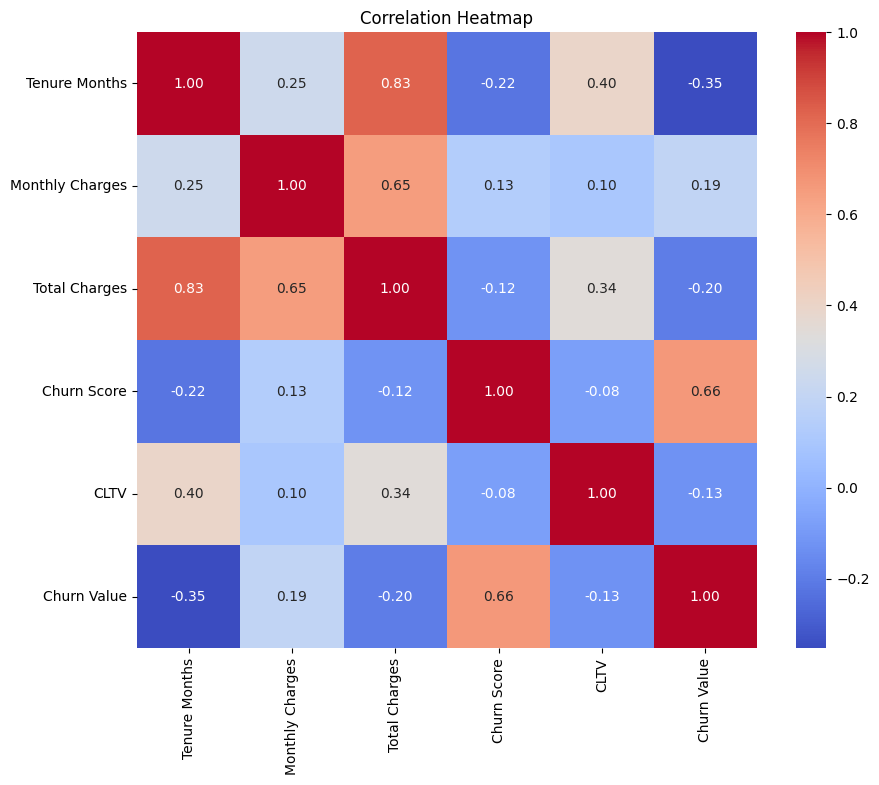

In [ ]:
# @title Correlation heatmap for numerical features
numerical_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV', 'Churn Value']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

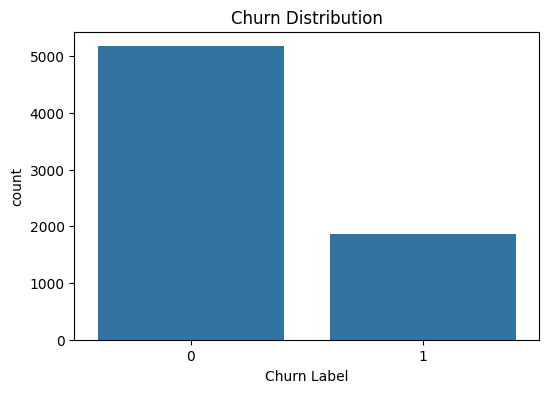

In [ ]:
# @title Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn Label', data=df)
plt.title('Churn Distribution')
plt.show()

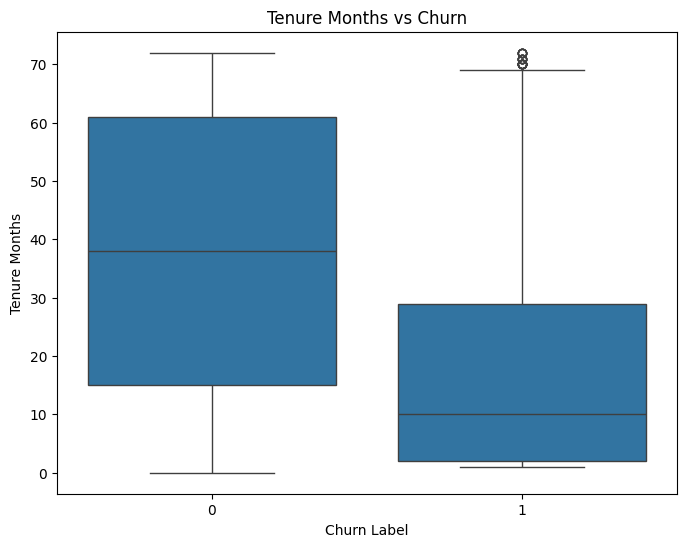

In [ ]:
# @title Tenure vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn Label', y='Tenure Months', data=df)
plt.title('Tenure Months vs Churn')
plt.show()

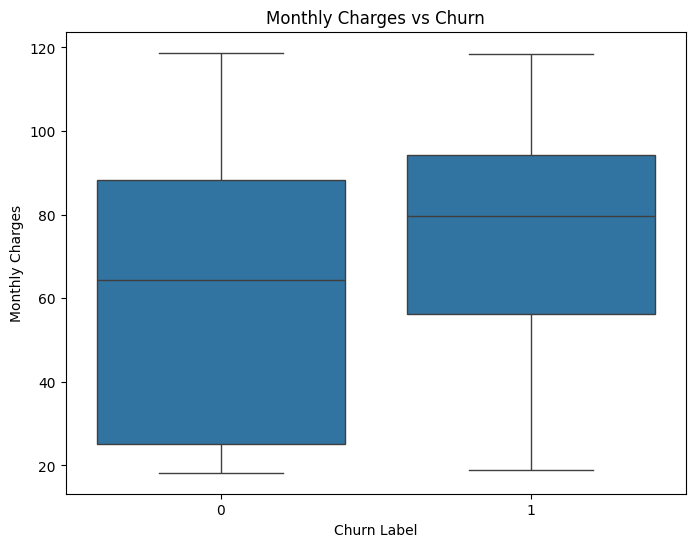

In [ ]:

#@title Monthly Charges vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn Label', y='Monthly Charges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

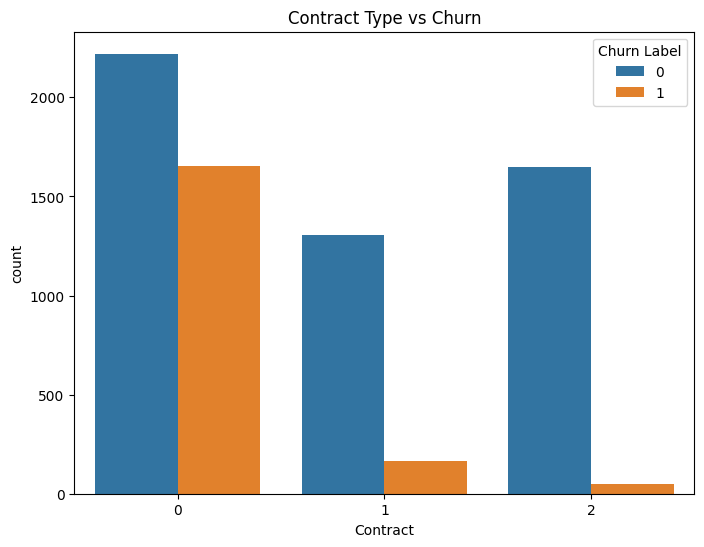

In [ ]:
#@title Contract vs Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn Label', data=df)
plt.title('Contract Type vs Churn')
plt.show()




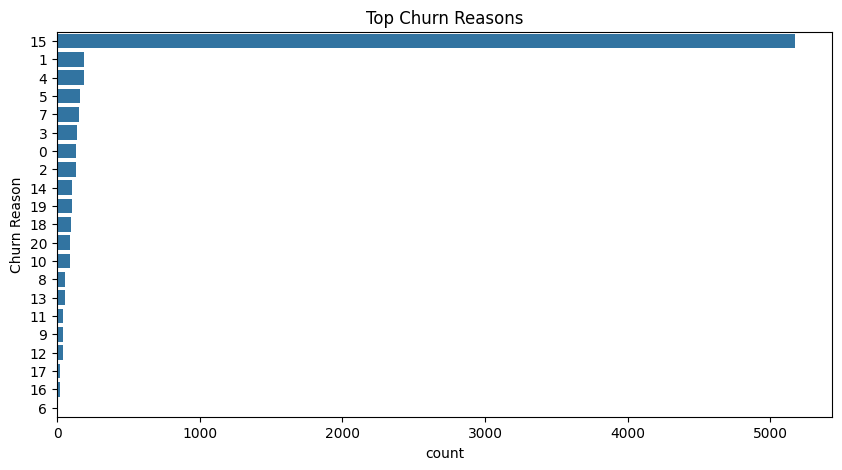

In [ ]:
#@title  Churn Reason
if 'Churn Reason' in df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(y='Churn Reason', data=df, order=df['Churn Reason'].value_counts().index)
    plt.title('Top Churn Reasons')
    plt.show()

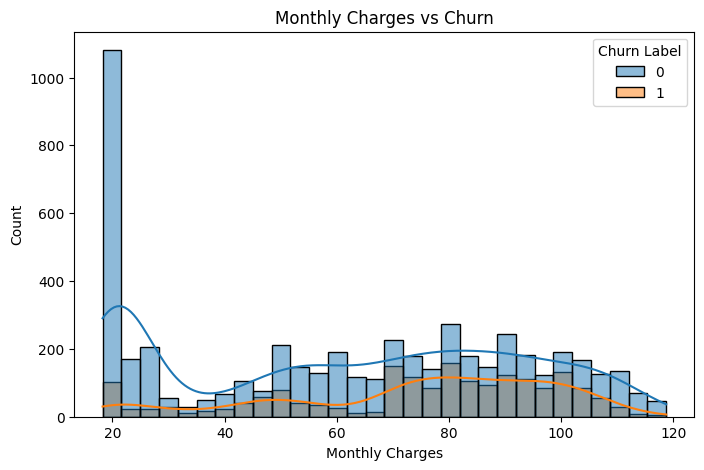

In [ ]:
#@title  Monthly Charges Distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Monthly Charges', hue='Churn Label', bins=30, kde=True)
plt.title('Monthly Charges vs Churn')
plt.show()

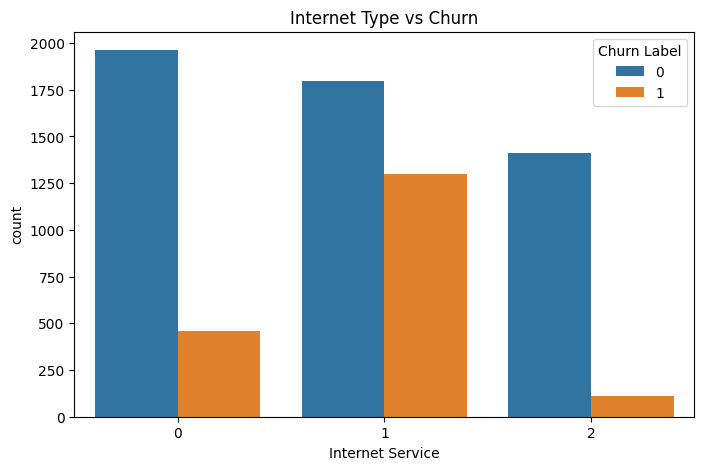

In [ ]:
#@title Internet Service vs Churn
plt.figure(figsize=(8,5))
sns.countplot(x='Internet Service', hue='Churn Label', data=df)
plt.title('Internet Type vs Churn')
plt.show()

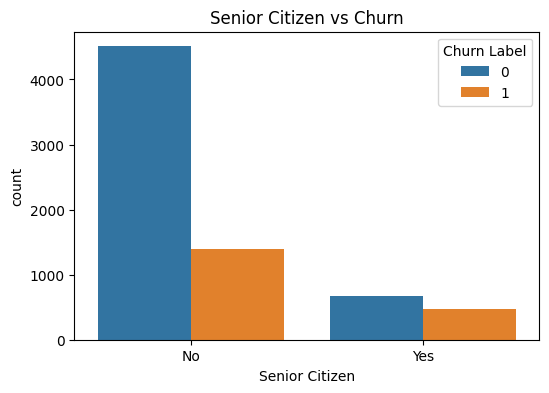

In [ ]:

#@title Senior Citizen vs Churn
plt.figure(figsize=(6,4))
sns.countplot(x='Senior Citizen', hue='Churn Label', data=df)
plt.title('Senior Citizen vs Churn')
plt.show()

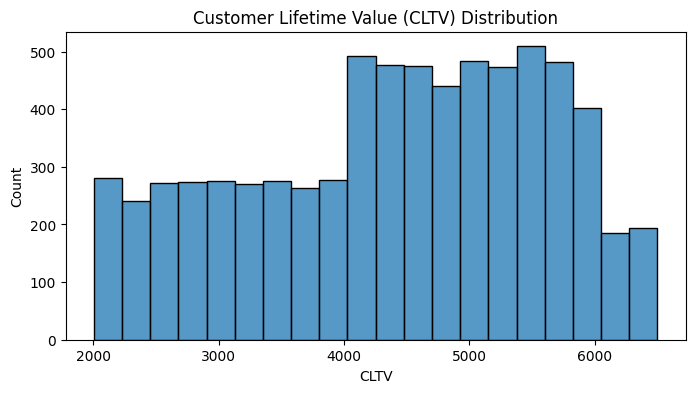

In [ ]:
#@title CLTV Distribution
if 'CLTV' in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df['CLTV'], bins=20)
    plt.title('Customer Lifetime Value (CLTV) Distribution')
    plt.show()

# Handle Imbalanced Data


In [ ]:
#@title  Check for non-numeric columns
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns in X_train:", non_numeric_cols)




Non-numeric columns in X_train: Index(['Senior Citizen'], dtype='object')


In [ ]:
#@title  Display unique values in those columns
for col in non_numeric_cols:
    print(f"\nColumn: {col}")
    print(X_train[col].unique())


Column: Senior Citizen
['No' 'Yes']


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit on combined train + test to ensure consistent mapping
combined = pd.concat([X_train['Senior Citizen'], X_test['Senior Citizen']])
le.fit(combined)

X_train['Senior Citizen'] = le.transform(X_train['Senior Citizen']).astype(float)
X_test['Senior Citizen'] = le.transform(X_test['Senior Citizen']).astype(float)

In [ ]:
# Check for non-numeric columns
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns in X_train:", non_numeric_cols)

# Display unique values in those columns
for col in non_numeric_cols:
    print(f"\nColumn: {col}")
    print(X_train[col].unique())

Non-numeric columns in X_train: Index([], dtype='object')


In [ ]:

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Class distribution after SMOTE:")
print(y_train_balanced.value_counts())

Class distribution after SMOTE:
Churn Value
0    4165
1    4165
Name: count, dtype: int64


#

#  Build and Train Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier




In [ ]:
#@title Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_balanced, y_train_balanced)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
 #@title Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

# Evaluating Models

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to evaluate model
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred):.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Logistic Regression Performance:
Accuracy: 0.9319
Precision: 0.8408
Recall: 0.9375
F1-Score: 0.8865
ROC-AUC: 0.9336


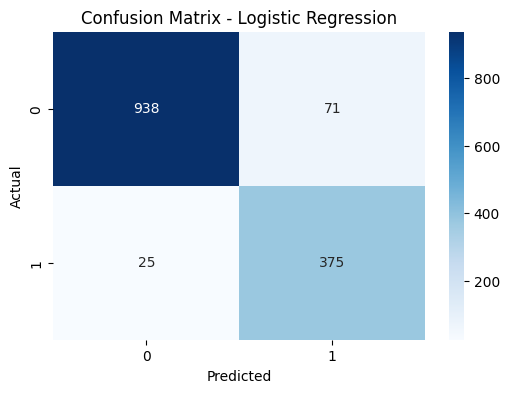

In [ ]:

# Evaluate models
evaluate_model(lr_model, X_test, y_test, "Logistic Regression")



Random Forest Performance:
Accuracy: 0.9993
Precision: 1.0000
Recall: 0.9975
F1-Score: 0.9987
ROC-AUC: 0.9988


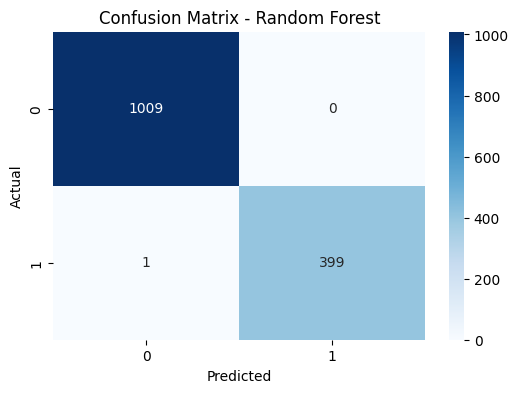

In [ ]:
evaluate_model(rf_model, X_test, y_test, "Random Forest")

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_field = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}


In [45]:

# Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_field, cv=5, scoring='f1')
grid_search.fit(X_train_balanced, y_train_balanced)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [ ]:

# Best parameters and model
print("Best Parametersstruct RandomForestClassifier(random_state=42) Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_




Tuned Random Forest Performance:
Accuracy: 0.9993
Precision: 1.0000
Recall: 0.9975
F1-Score: 0.9987
ROC-AUC: 0.9988


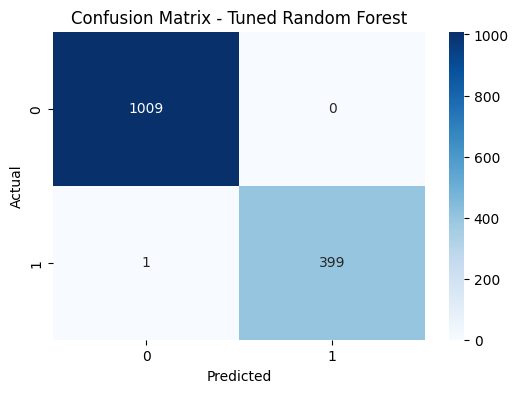

In [47]:
# Evaluate tuned model
evaluate_model(best_rf_model, X_test, y_test, "Tuned Random Forest")

#  Feature importance

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Feature importance for Random Forest
importances = best_rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


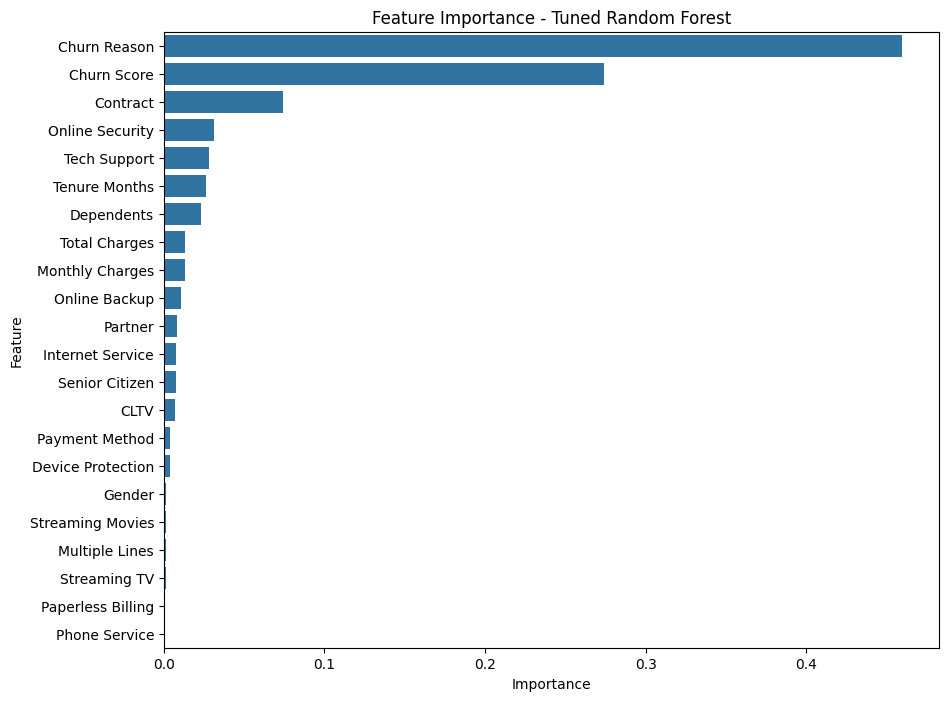

In [49]:
# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Tuned Random Forest')
plt.show()

# Making Predictions

In [50]:
# Predict churn for a single customer
new_customer = X_test.iloc[0:1]
prediction = best_rf_model.predict(new_customer)
prob = best_rf_model.predict_proba(new_customer)[:, 1]
print(f"Predicted Churn: {'Yes' if prediction[0] == 1 else 'No'}")
print(f"Churn Probability: {prob[0]:.4f}")

Predicted Churn: Yes
Churn Probability: 0.9945


# Save the Mode

In [51]:
import joblib

# Save the tuned Random Forest model
joblib.dump(best_rf_model, 'churn_model.pkl')

['churn_model.pkl']


Random Forest Performance:
Accuracy: 0.9979
Precision: 1.0000
Recall: 0.9925
F1-Score: 0.9962
ROC-AUC: 0.9963


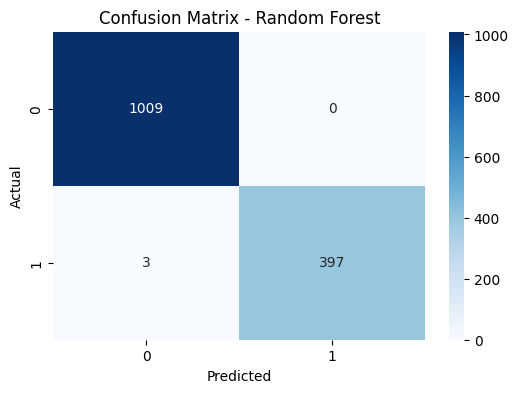

In [52]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest model
evaluate_model(rf_model, X_test, y_test, "Random Forest")

# Visualize Model Performance

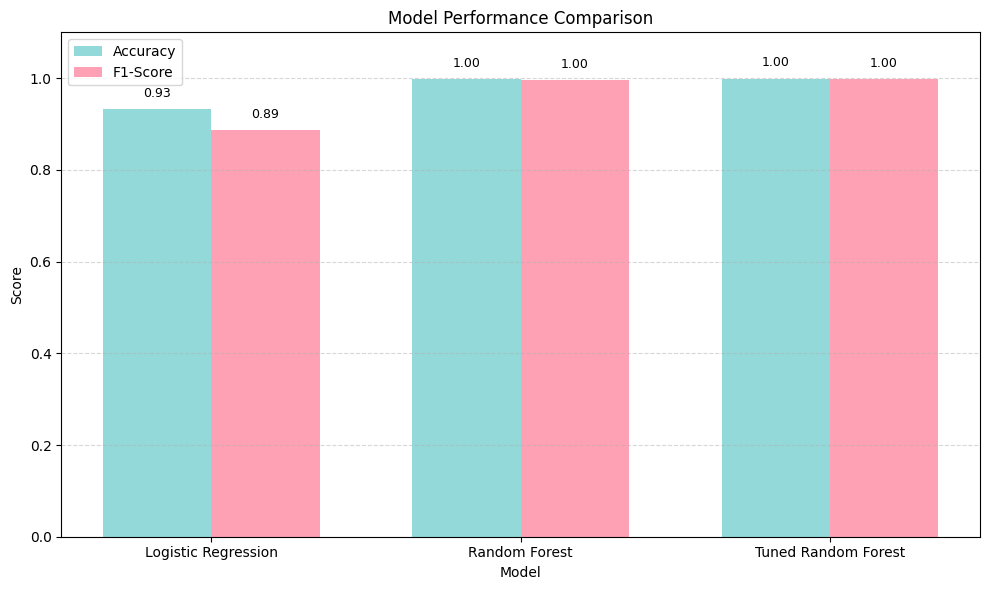

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score

# Calculate metrics
models = ['Logistic Regression', 'Random Forest', 'Tuned Random Forest']
accuracies = [
    accuracy_score(y_test, lr_model.predict(X_test)),
    accuracy_score(y_test, rf_model.predict(X_test)),
    accuracy_score(y_test, best_rf_model.predict(X_test))
]
f1_scores = [
    f1_score(y_test, lr_model.predict(X_test)),
    f1_score(y_test, rf_model.predict(X_test)),
    f1_score(y_test, best_rf_model.predict(X_test))
]

# Bar chart for model comparison
plt.figure(figsize=(10, 6))
x = range(len(models))
width = 0.35

# Colors in RGBA format (scaled to 0-1)
accuracy_color = (75/255, 192/255, 192/255, 0.6)   # Teal
f1_score_color = (255/255, 99/255, 132/255, 0.6)   # Pink

# Plot bars
bars1 = plt.bar([i - width/2 for i in x], accuracies, width, label='Accuracy', color=accuracy_color)
bars2 = plt.bar([i + width/2 for i in x], f1_scores, width, label='F1-Score', color=f1_score_color)

# Add grid
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Add value labels
for bar in bars1 + bars2:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.02,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=9
    )

# Labels and legend
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, models)
plt.ylim(0, 1.1)
plt.legend()
plt.tight_layout()
plt.show()
